In [0]:
# Simulations using Brian
# Solutions to exercises 2.1 through 2.4, 6.1 through 6.4
# Exercise Links:
# 1. https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html
# 2. https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install neurodynex

     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 1.6MB 45.5MB/s 
     |████████████████████████████████| 5.6MB 53.9MB/s 
  Created wheel for brian2: filename=Brian2-2.3-cp36-cp36m-linux_x86_64.whl size=1283399 sha256=89de299b63dfa7f18bb1ee93738b870867b80ae8c95d3d283935844423a94cfc
  Stored in directory: /root/.cache/pip/wheels/d0/53/ca/54953abc5f741ebd69a87da3b87f3630c5073d26d2d4426cc9
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [4]:
pip install brian2

nr of spikes: 0


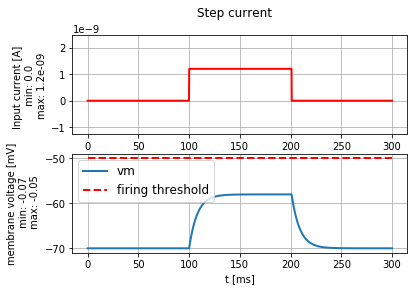

nr of spikes: 5


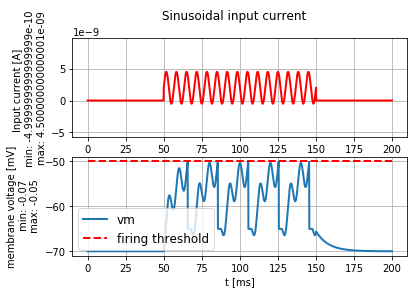

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [5]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()
# testing out given code

In [6]:
from neurodynex.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -0.07


In [0]:
#V_REST = -70*b2.mV
#V_RESET = -65*b2.mV
#FIRING_THRESHOLD = -50*b2.mV
#MEMBRANE_RESISTANCE = 10. * b2.Mohm
#MEMBRANE_TIME_SCALE = 8. * b2.ms
#ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

In [0]:
u_t = LIF.FIRING_THRESHOLD
u_rest = LIF.V_REST
R = LIF.MEMBRANE_RESISTANCE
tau = LIF.MEMBRANE_TIME_SCALE

In [0]:
t = 100 * b2.ms

\begin{equation} u(t) = u_{rest} + RI_0(1 - e^{{-t}/{\tau}}) \end{equation}

\begin{equation} I_0 = \frac{\theta - u_{rest}} {R(1 - e^{{-t}/{\tau}})} \end{equation}

In [10]:
# minimal current calculation
import math
i_min = (u_t - u_rest) / (R * (1 - math.exp(- t / tau)))
print("Minimal Current:", str(i_min))

Minimal Current: 2.00000745 nA


nr of spikes: 0


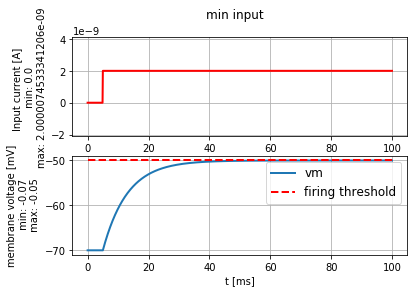

In [11]:
# creating a step current with amplitude= i_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms, amplitude= i_min)  # set i_min to your value

# running the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

In [0]:
# running the LIF model
# Note: As we do not specify any model parameters, the simulation runs with the default values
current_values = [i for i in range(0, 101)] * b2.nA
f = []

for current in current_values:
  step_current = input_factory.get_step_current(t_start=0, t_end=500, unit_time=b2.ms, amplitude= current)
  (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current = step_current, simulation_time=500. * b2.ms, abs_refractory_period=3. * b2.ms)
  f.append(spike_monitor.count[0] / (500. * b2.ms))

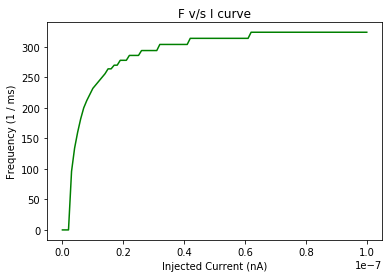

In [13]:
plt.plot(current_values, f, color = 'green')
plt.xlabel("Injected Current (nA)")
plt.ylabel("Frequency (1 / ms)")
plt.title("F v/s I curve")
plt.show()

In [0]:
# Maximum rate of neuron firing
# Fires, at the end of the refractory period, refires
# Maximum rate 1 / (3 ms)

\begin{equation} f_{max} = \frac{1} {t_{ref}} \end{equation}
$ t_{ref} = 3 ms $, and therefore $ f_{max} = 333 Hz$

(<matplotlib.axes._subplots.AxesSubplot at 0x7f04a9c06c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f04a9861080>)

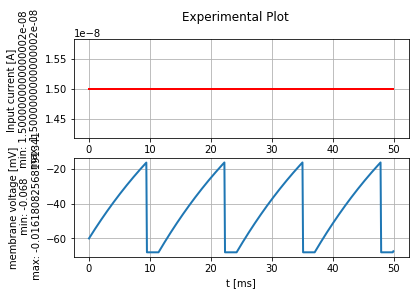

In [15]:
# Getting a random parameter, provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed = 432)

# defining test current
test_current = input_factory.get_step_current(
    t_start = 0, t_end=500, unit_time= b2.ms, amplitude= 15 * b2.namp)

# probing the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="Experimental Plot")

# to print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

In [16]:
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


In [0]:
# Compare with estimated Values
# Make a comment on how that went.

nr of spikes: 0


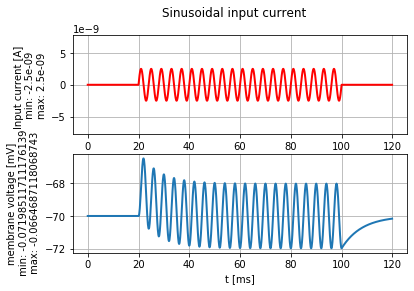

In [18]:
# Creating a sinusoidal input current
# Injecting it into the LIF neuron
# Determining the phase and amplitude of the membrane voltage

# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [19]:
import numpy as np
# Determining Phase and Amplitude
phase = np.arccos(LIF.MEMBRANE_TIME_SCALE * 50 * np.pi * b2.Hz / ((LIF.MEMBRANE_TIME_SCALE * 50 * np.pi * b2.Hz)**2 + 1))
print("Phase:", str(phase))
amp = (5 * b2.namp * LIF.MEMBRANE_RESISTANCE/ LIF.MEMBRANE_TIME_SCALE) * (LIF.MEMBRANE_TIME_SCALE / np.sqrt((LIF.MEMBRANE_TIME_SCALE ** 2 * (2 * np.pi * 250 * b2.Hz) ** 2) + 1))
print("Amplitude:", str(amp))

Phase: 1.0618794608248938
Amplitude: 3.96633484 mV


General form of the differential equation:
\begin{equation} \tau\frac{du}{dt} = -(u - u_{rest}) + RI\sin(\omega t) \end{equation}

Current $ I $ is the amplitude. We obtain the phase $ \phi $ from this equation as:
\begin{equation} \phi = {\cos}^{-1}(\frac{1}{\sqrt{{\tau}^2{\omega}^2 + 1}}) \end{equation}

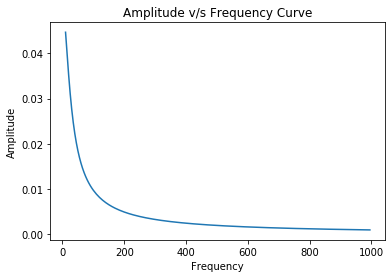

In [20]:
frequencies = list(range(10, 1000, 5))
amplitudes = []

for freq in frequencies:
  amplitudes.append((5 * b2.namp * LIF.MEMBRANE_RESISTANCE / LIF.MEMBRANE_TIME_SCALE) * (LIF.MEMBRANE_TIME_SCALE / np.sqrt((LIF.MEMBRANE_TIME_SCALE ** 2 * (2 * np.pi * freq * b2.Hz) ** 2) + 1)))

plt.title("Amplitude v/s Frequency Curve")
plt.plot(frequencies, amplitudes)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

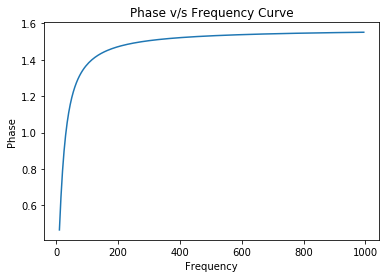

In [21]:
phases = []
for freq in frequencies:
  phases.append(np.arccos(1 / np.sqrt((LIF.MEMBRANE_TIME_SCALE * freq * 2 * np.pi * b2.Hz)**2 + 1)))

plt.title("Phase v/s Frequency Curve")
plt.plot(frequencies, phases)
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.show()

In [0]:
# This is approximately a low-pass filter

In [0]:
# We need the Hodgkin-Huxley Model
from neurodynex.hodgkin_huxley import HH

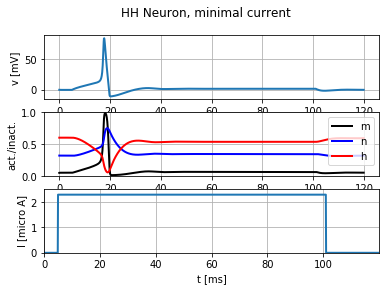

In [24]:
# finding lowest step current amplitude I_min for generating at least one spike
# trying out different input amplitudes in the code fragmentcurrent = input_factory.get_step_current(5, 100, b2.ms, 2.3 * b2.uA)

I_min = 2.2930
current = input_factory.get_step_current(5, 100, b2.ms, I_min * b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

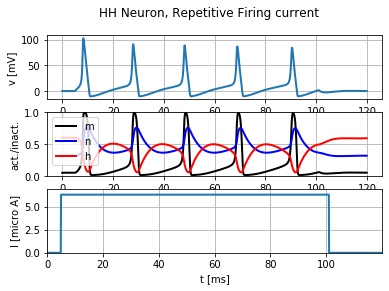

In [25]:
I_repetitive = 6.2860
current = input_factory.get_step_current(5, 100, b2.ms, I_repetitive * b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, Repetitive Firing current")

voltage_slow=0.00878306041868613


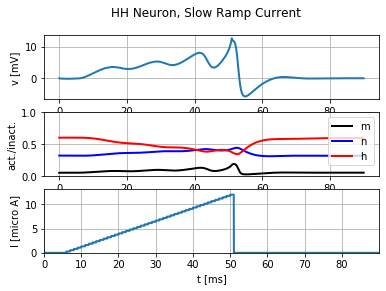

In [26]:
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 50
# Spikes for 51, 50 is the minimum such value
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end * b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))
HH.plot_data(state_monitor, title="HH Neuron, Slow Ramp Current")

voltage_fast=0.006372525642718144


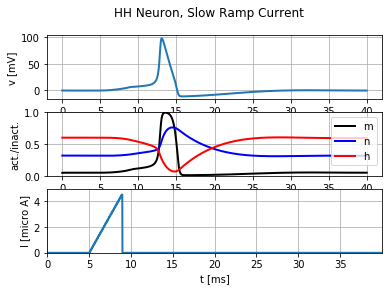

In [27]:
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 89
# does not spike for 88, 89 is the minimum value
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))
HH.plot_data(state_monitor, title="HH Neuron, Slow Ramp Current")

In [0]:
# Analyzing the above two cases

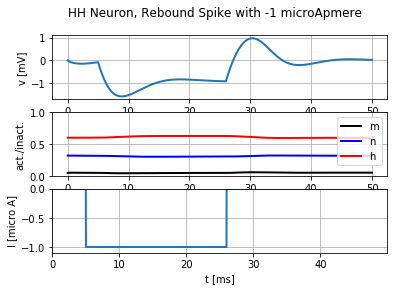

In [29]:
# Case 1, Amplitude = -1 microAmpere
rebound_current = input_factory.get_step_current(t_start=5, t_end=25, unit_time=b2.ms, amplitude= -1 * b2.uamp)
state_monitor = HH.simulate_HH_neuron(rebound_current, 50 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, Rebound Spike with -1 microApmere")

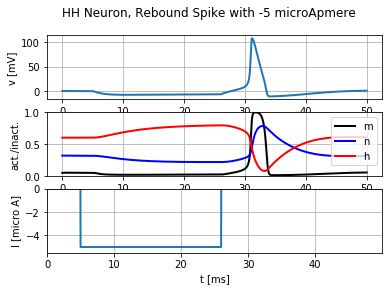

In [30]:
# Case 2, Amplitude = -5 microAmpere
rebound_current = input_factory.get_step_current(t_start=5, t_end=25, unit_time=b2.ms, amplitude= -5 * b2.uamp)
state_monitor = HH.simulate_HH_neuron(rebound_current, 50 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, Rebound Spike with -5 microApmere")

In [0]:
# slow ramp: NO action potential generated
# fast ramp: Increase in current activates the Na+ channel

In [0]:
def simulate_HH_neuron_with_Na_factor(input_current, simulation_time, Na_factor = 1):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * Na_factor * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

WARNING    "t" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 100. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


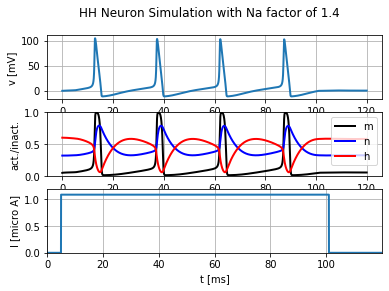

In [33]:
input_current = input_factory.get_step_current(5, 100, b2.ms, 1.08 * b2.uA)
state_monitor = simulate_HH_neuron_with_Na_factor(input_current, 120 * b2.ms, Na_factor = 1.4)
HH.plot_data(state_monitor, title="HH Neuron Simulation with Na factor of 1.4")

In [0]:
# 1.08 uA is the required minimal current for repeated firing

WARNING    "t" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value 100. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


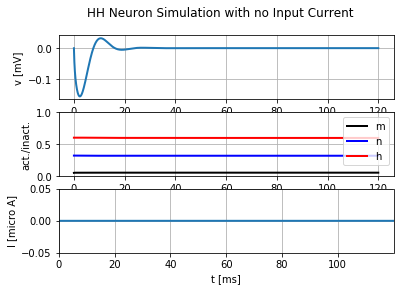

In [35]:
# simulation with no input current
state_monitor = simulate_HH_neuron_with_Na_factor(input_factory.get_zero_current(), 120 * b2.ms, 1)
HH.plot_data(state_monitor, title="HH Neuron Simulation with no Input Current")

In [0]:
# Link with Goldman–Hodgkin–Katz Equation 

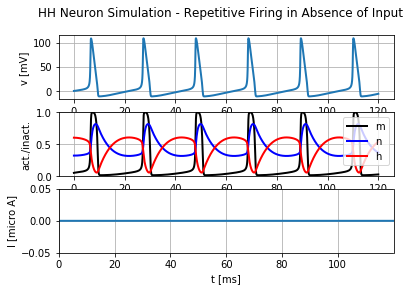

In [37]:
# simulation with no input current
state_monitor = simulate_HH_neuron_with_Na_factor(input_factory.get_zero_current(), 120 * b2.ms, 1.8)
HH.plot_data(state_monitor, title="HH Neuron Simulation - Repetitive Firing in Absence of Input")

In [0]:
# Reason behind repeated firing

In [0]:
# ^_^ Thank You